In [1]:
import numpy as np
import casadi as ca
import matplotlib.pyplot as plt

In [12]:
class simple_method:
    def __init__(self, depth, total_points):

        tot_points = total_points
        
        self.x = np.linspace(0,depth,tot_points) 

        self.M = depth/(tot_points-1) * 0.5 * (np.identity(tot_points)+ np.diag(np.ones(tot_points -1), -1))
        

In [50]:
layers = 10
segments = 10
length = 40
tot_points = layers*segments


Mx = simple_method(length, tot_points)

res_conc = np.exp(-Mx.x)
beta = np.exp(-Mx.x**2)+0.001
lam = ca.MX.sym('lam', 2)

sigma = ca.MX.sym('sigma', Mx.x.shape[0])
sigma_p = ca.MX.sym('sigma_p', Mx.x.shape[0])
sigma_bar = ca.MX.sym('sigma_bar', Mx.x.shape[0])
inte = np.ones(tot_points).reshape(1,tot_points) 

gamma0 = 1
gamma1 = 1
gamma2 = 2
gamma3 = 1
gamma4 = 1
gamma5 = 0.5

df1 = (res_conc* gamma1/(gamma0*inte @ (Mx.M @ (sigma*res_conc)) + gamma1)**2-sigma_p*beta/(gamma2+gamma3*inte @ (Mx.M @ (sigma*beta*sigma_p)))) - lam[0]*np.ones(tot_points)
df2 = (gamma4*sigma*beta/(gamma3*inte @ (Mx.M @ (sigma*beta*sigma_p))+gamma4)**2) - lam[1]*np.ones(tot_points)

g1 = inte @ Mx.M @ (df1*sigma) + inte @ Mx.M @ (df2*sigma_p) #
g2 = inte @ Mx.M @ sigma_p - 1
g3 = inte @ Mx.M @ sigma - 1
g4 = ca.vertcat(-df1, -df2)
g = ca.vertcat(g1, g2, g3, g4)

f = 0

In [51]:
import time as time

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  | 383.00us ( 34.82us)  53.03us (  4.82us)        11
       nlp_g  |  13.12ms (  1.19ms)   2.00ms (181.93us)        11
  nlp_grad_f  | 464.00us ( 38.67us)  82.04us (  6.84us)        12
   nlp_jac_g  | 304.31ms ( 25.36ms)  50.48ms (  4.21ms)        12
       total  |   1.14 s (  1.14 s) 179.68ms (179.68ms)         1
Solved 0.264693021774292


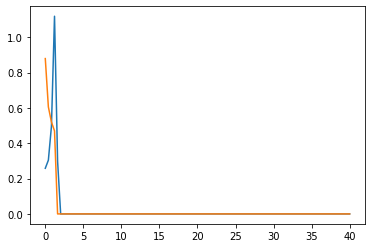

In [58]:
sigmas = ca.vertcat(sigma, sigma_p)
x = ca.vertcat(*[sigmas, lam])
lbg = np.zeros(3 + sigmas.size()[0])
ubg = ca.vertcat(*[np.zeros(3), [ca.inf]*sigmas.size()[0]])

s_opts = {'ipopt': {'print_level' : 1, 'linear_solver':'ma57', 'hessian_approximation':'limited-memory', 'acceptable_iter': 5} }#, 'tol':10**-3, 'acceptable_tol': 10**(-2)}}
prob = {'x': x, 'f': f, 'g': g}
lbx = ca.vertcat(*[np.zeros(x.size()[0] - 2), -ca.inf, -ca.inf])
ubx = ca.vertcat(*[(x.size()[0])*[ca.inf]])

t0 = time.time()
solver = ca.nlpsol('solver', 'ipopt', prob, s_opts)
sol = solver(lbx = lbx, lbg = lbg, ubg = ubg, x0=x_out)
t1 = time.time()

print("Solved", t1-t0)
x_out = np.array(sol['x']).flatten()
#print(x_out)
plt.plot(Mx.x, x_out[0:tot_points])
plt.plot(Mx.x, x_out[tot_points:2*tot_points])

In [85]:
x_out[-2:]

array([0.12146866, 0.15256563])

In [86]:
x_out

array([2.31076475e-01, 2.59183571e-01, 3.65696588e-01, 6.48800268e-01,
       1.44524272e+00, 6.33589207e-08, 2.42368018e-08, 1.48024776e-08,
       1.07673343e-08, 8.61836897e-09, 7.34225074e-09, 6.53554965e-09,
       6.00539132e-09, 5.64805571e-09, 5.40309201e-09, 5.23320909e-09,
       5.11444860e-09, 5.03096157e-09, 4.97204080e-09, 4.93034249e-09,
       4.90077479e-09, 4.87977965e-09, 4.86485696e-09, 4.85424297e-09,
       4.84668984e-09, 4.84131298e-09, 4.83748439e-09, 4.83475775e-09,
       4.83281565e-09, 4.83143222e-09, 4.83044669e-09, 4.82974459e-09,
       4.82924439e-09, 4.82888802e-09, 4.82863412e-09, 4.82845322e-09,
       4.82832433e-09, 4.82823250e-09, 4.82816708e-09, 4.82812046e-09,
       4.82808725e-09, 4.82806358e-09, 4.82804672e-09, 4.82803471e-09,
       4.82802615e-09, 4.82802005e-09, 4.82801571e-09, 4.82801261e-09,
       4.82801040e-09, 4.82800883e-09, 4.82800771e-09, 4.82800692e-09,
       4.82800635e-09, 4.82800594e-09, 4.82800565e-09, 4.82800545e-09,
      

In [79]:
inte @ (Mx.M @ Mx.x)

array([200.])

In [80]:
inte @ Mx.M @ (x_out[0:tot_points])

array([1.])

In [81]:
inte @ Mx.M @ (x_out[0:tot_points])

array([1.])

In [82]:
inte @ Mx.M @ (x_out[tot_points:2*tot_points])

array([1.])

In [83]:
x_out[tot_points:2*tot_points]

array([1.04167447e+00, 7.25583121e-01, 5.78623777e-01, 4.63873507e-01,
       1.40245087e-01, 6.86919787e-10, 6.96648655e-10, 6.98825017e-10,
       6.99194488e-10, 6.99257540e-10, 6.99270932e-10, 6.99275919e-10,
       6.99278774e-10, 6.99280646e-10, 6.99281917e-10, 6.99282794e-10,
       6.99283405e-10, 6.99283833e-10, 6.99284135e-10, 6.99284348e-10,
       6.99284499e-10, 6.99284606e-10, 6.99284682e-10, 6.99284736e-10,
       6.99284775e-10, 6.99284802e-10, 6.99284822e-10, 6.99284835e-10,
       6.99284845e-10, 6.99284852e-10, 6.99284857e-10, 6.99284861e-10,
       6.99284863e-10, 6.99284865e-10, 6.99284867e-10, 6.99284867e-10,
       6.99284868e-10, 6.99284869e-10, 6.99284869e-10, 6.99284869e-10,
       6.99284869e-10, 6.99284869e-10, 6.99284870e-10, 6.99284870e-10,
       6.99284870e-10, 6.99284870e-10, 6.99284870e-10, 6.99284870e-10,
       6.99284870e-10, 6.99284870e-10, 6.99284870e-10, 6.99284870e-10,
       6.99284870e-10, 6.99284870e-10, 6.99284870e-10, 6.99284870e-10,
      